<a href="https://colab.research.google.com/github/NotExplosion/C4GC2023_RohanK/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#File Download Link: https://bit.ly/fpptute1 (same file as for chapter 2)
#The built-in R datasets used in the book are not readily available for Python, so the examples are shown using the tutorial dataset from chapter 2.
#Necessary imports for this chapter:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import math

In [4]:
#function to calculate the total mean and standard deviation of an entire time series
def ts_meanstd(ts):
  mean = round(ts.mean(axis=0), 3)
  std = round(ts.std(axis=0), 3)
  print("Mean:", mean, ", Standard Deviation:", std)
  return mean, std

In [10]:
#Importing data
fin_data = pd.read_csv("tute1.csv")
time_index = fin_data['Quarter'].copy()
fin_data['Quarter'] = pd.to_datetime(fin_data['Quarter'], format='%Y-%m')
fin_data.index = fin_data['Quarter']

del fin_data['Quarter']

fin_data.head()

,Sales,AdBudget,GDP
Quarter,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


In [ ]:
#Rolling average and standard deviation implementation
#'4' represents the window size, which in this case is the number of seasons per year
r_std = fin_data.rolling(4).std()
r_mean = fin_data.rolling(4).mean()

2.6693589067902184


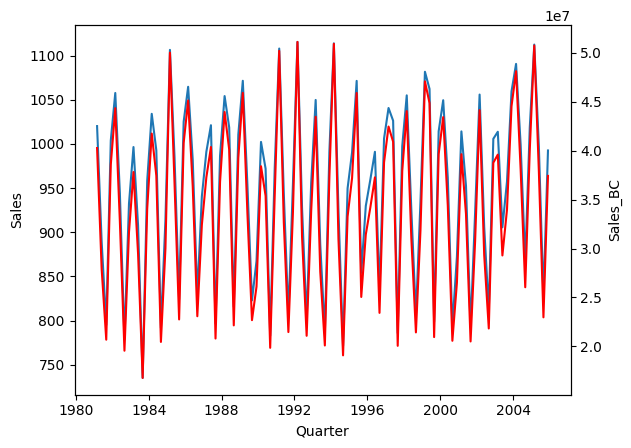

In [ ]:
#Box-Cox implementation, for future reference
fin_data['Sales_BC'], lmbda = stats.boxcox(fin_data['Sales'])
fin_data.head()

#Plotting the shape of the original data against the shape of the transformed data
ax = sns.lineplot(fin_data['Sales'])
ax2 = ax.twinx()
#Box-Cox axis on the right, sales axis on the left
sns.lineplot(fin_data['Sales_BC'], ax=ax2, color='red')
#Red is the transformed data, blue is the original data

#Lambda value that was extracted when transforming the data
print(lmbda)

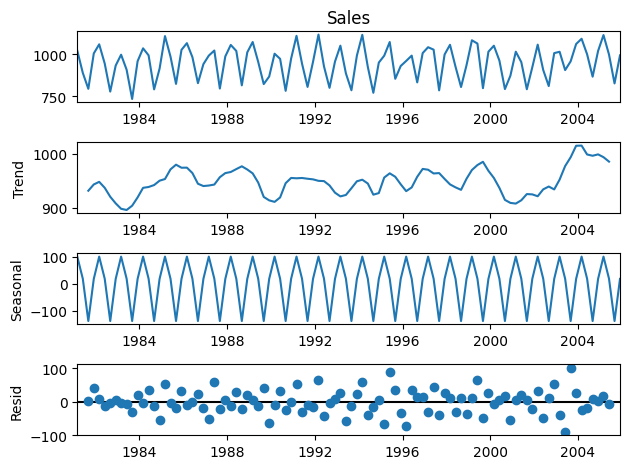

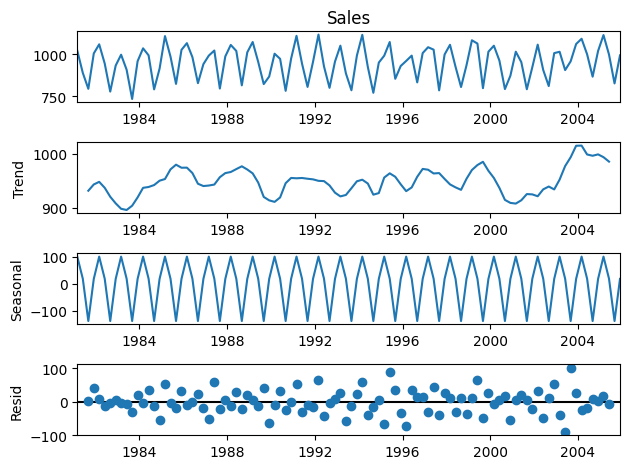

In [ ]:
#Seasonal additive decomposition, for sales
result = seasonal_decompose(fin_data['Sales'], model = 'additive')
result.plot()

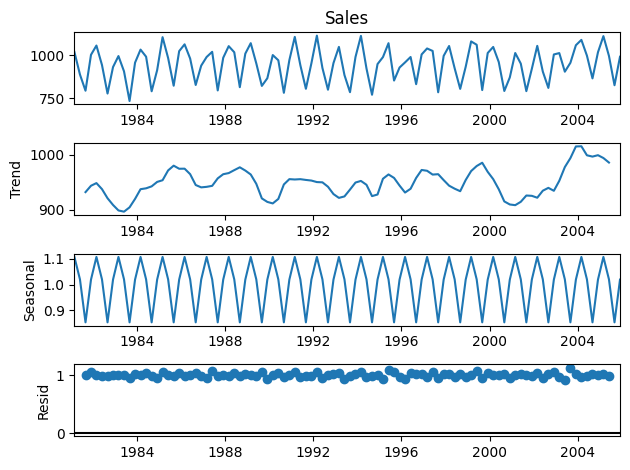

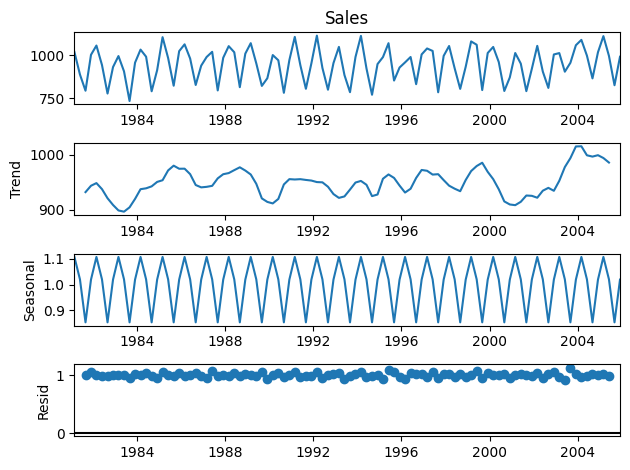

In [ ]:
#Seasonal multiplicative decomposition, for sales
result = seasonal_decompose(fin_data['Sales'], model = 'multiplicative')
result.plot()

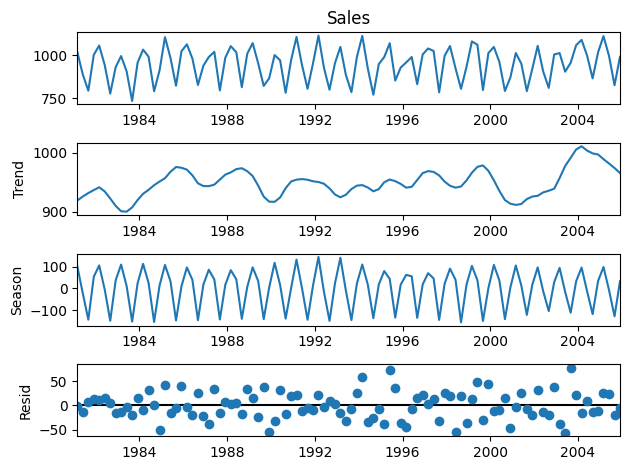

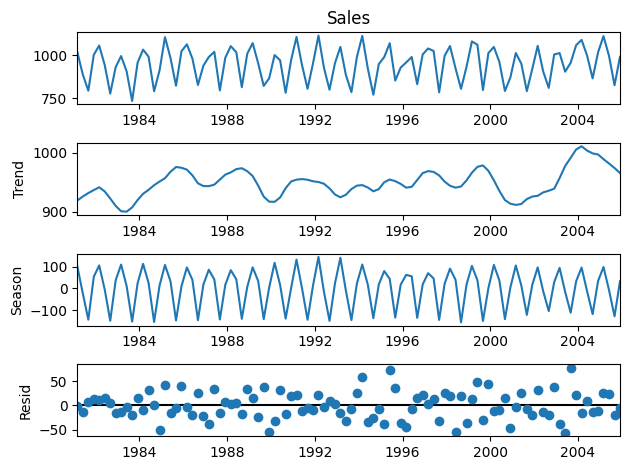

In [ ]:
#STL decomposition
stl = STL(fin_data['Sales']).fit()
stl.plot()

In [58]:
#Generating a dataframe with a 'Trend' column (consecutive integers from 0-99)
data = []
for i in range(1,101):
  data.append(i)
df = pd.DataFrame(data, columns=['Trend'])

#Defining the seasonality column, which is a repeating cosine pattern
df['Seasonality'] = np.abs(np.cos(df['Trend'] * math.pi * 0.5))

#Changing the index to a date-time index
df['Quarter'] = time_index
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%Y-%m')
df.index = df['Quarter']
del df['Quarter']

df.head()

,Trend,Seasonality
Quarter,,
1981-03-01,1,6.123234e-17
1981-06-01,2,1.000000e+00
1981-09-01,3,1.836970e-16
1981-12-01,4,1.000000e+00
1982-03-01,5,3.061617e-16


<Axes: xlabel='Quarter', ylabel='Additive'>

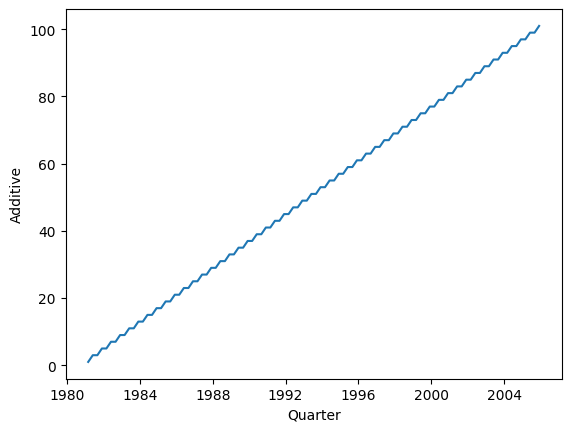

In [59]:
#Additive column creation
df['Additive'] = df['Trend'] + df['Seasonality']
sns.lineplot(df['Additive'])

<Axes: xlabel='Quarter', ylabel='Multiplicative'>

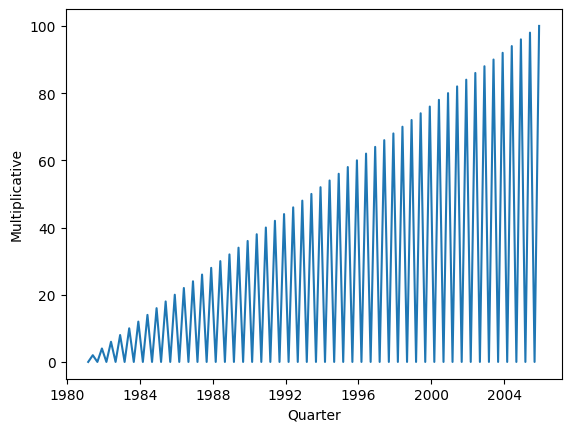

In [60]:
#Multiplicative column creation
df['Multiplicative'] = df['Trend'] * df['Seasonality']
sns.lineplot(df['Multiplicative'])

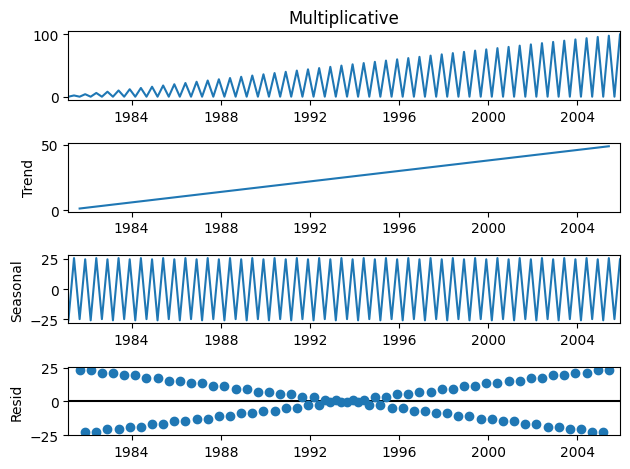

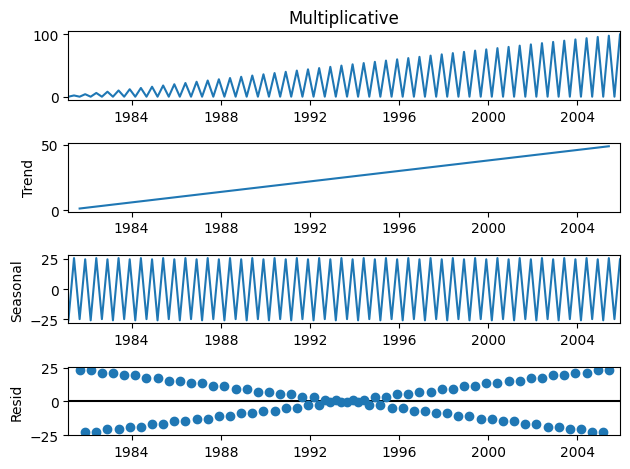

In [61]:
#Testing additive decomposition on generated multiplicative data
result = seasonal_decompose(df['Multiplicative'], model = 'additive')
result.plot()

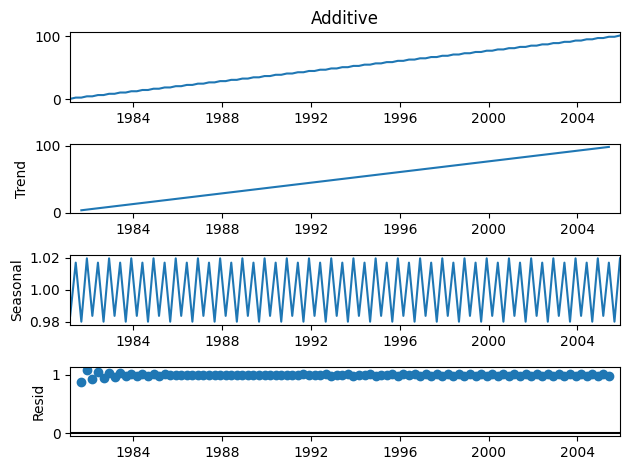

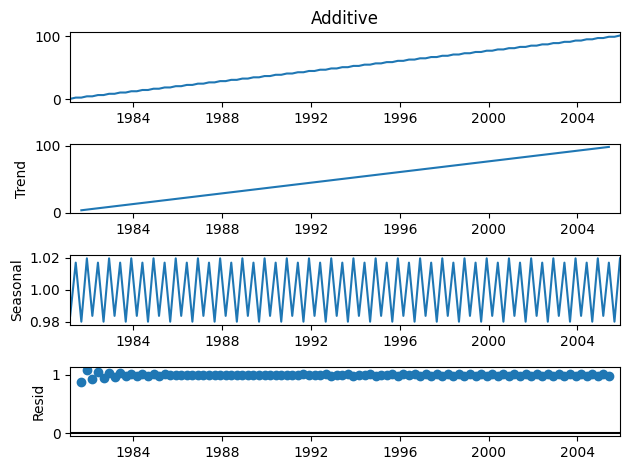

In [62]:
#Testing multiplicative decomposition on generated additive data
result = seasonal_decompose(df['Additive'], model = 'multiplicative')
result.plot()